In [28]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [57]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [58]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [13]:
# Training settings
parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                    help='input batch size for training (default: 64)')
parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                    help='input batch size for testing (default: 1000)')
parser.add_argument('--epochs', type=int, default=10, metavar='N',
                    help='number of epochs to train (default: 10)')
parser.add_argument('--lr', type=float, default=0.01, metavar='LR',
                    help='learning rate (default: 0.01)')
parser.add_argument('--momentum', type=float, default=0.5, metavar='M',
                    help='SGD momentum (default: 0.5)')
parser.add_argument('--no-cuda', action='store_true', default=False,
                    help='disables CUDA training')
parser.add_argument('--seed', type=int, default=1, metavar='S',
                    help='random seed (default: 1)')
parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                    help='how many batches to wait before logging training status')
parser.add_argument('--save-model', action='store_true', default=False,
                    help='For Saving the current Model')

_StoreTrueAction(option_strings=['--save-model'], dest='save_model', nargs=0, const=True, default=False, type=None, choices=None, help='For Saving the current Model', metavar=None)

In [14]:
%tb
#parser
args = parser.parse_args()
#args

SystemExit: 2

usage: ipykernel_launcher.py [-h] [--batch-size N] [--test-batch-size N]
                             [--epochs N] [--lr LR] [--momentum M] [--no-cuda]
                             [--seed S] [--log-interval N] [--save-model]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/1001235/Library/Jupyter/runtime/kernel-48b618c3-c7b7-40a6-9fef-e38fc42b7701.json


SystemExit: 2

In [59]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

In [60]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=1000, shuffle=True)

In [62]:
train_loader.dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  23, 141, 255, 227, 145,  17,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
          11,  89, 228, 254, 253, 253, 244,  45,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

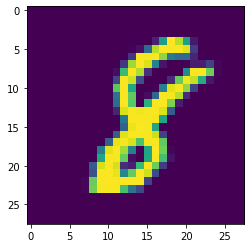

In [73]:
print(train_loader.dataset.data[545])
plt.imshow(train_loader.dataset.data[545])

In [64]:
train_loader.dataset.targets.data[545]


tensor(8)

In [65]:
device = 'cpu'
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

train(model, device, train_loader, optimizer, 1)
test(model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293206
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.398929
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.261139
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.244311
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.208471
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.124031
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.197761
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.189386
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.326726
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.051014

Test set: Average loss: 0.0807, Accuracy: 9757/10000 (98%)



In [66]:
train(model, device, train_loader, optimizer, 2)
test(model, device, test_loader)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.031348
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.101865
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.140083
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.047237
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.015814
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.103996
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.029551
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.053649
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.155893
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.069987

Test set: Average loss: 0.0658, Accuracy: 9801/10000 (98%)



In [67]:
train(model, device, train_loader, optimizer, 3)
test(model, device, test_loader)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.092686
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.027803
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.150815
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.040926
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.042622
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.136419
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.051782
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.037577
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.050735
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.022587

Test set: Average loss: 0.0483, Accuracy: 9841/10000 (98%)



In [68]:
train(model, device, train_loader, optimizer, 4)
test(model, device, test_loader)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.046789
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.022696
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.079017
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.097384
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.040312
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.128733
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.006495
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.031472
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.093547
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.028888

Test set: Average loss: 0.0381, Accuracy: 9873/10000 (99%)



In [69]:
train(model, device, train_loader, optimizer, 5)
test(model, device, test_loader)

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.016209
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.009542
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.077293
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.058302
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.022176
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.012908
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.094640
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.015083
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.049532
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.013540

Test set: Average loss: 0.0371, Accuracy: 9886/10000 (99%)



In [70]:
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[ 9.9038e-02,  1.3467e-01,  1.3211e-01,  1.9545e-01, -3.6098e-02],
                        [-1.1920e-01,  4.1907e-02,  1.0993e-01,  1.7918e-02,  6.1213e-02],
                        [ 2.1201e-01, -2.4438e-02,  2.4877e-02, -2.1449e-01, -1.9199e-02],
                        [ 2.1653e-01,  2.4317e-01,  1.1764e-01, -5.0203e-02, -2.5267e-01],
                        [ 2.4052e-01,  6.5323e-03, -1.4007e-01, -9.8759e-02, -1.9873e-01]]],
              
              
                      [[[ 4.9599e-02,  1.0361e-01,  1.0746e-01, -4.2895e-02, -8.1431e-02],
                        [-1.8011e-01, -2.4550e-01, -2.6418e-01, -9.0812e-02, -1.4901e-01],
                        [-4.0589e-02, -1.1692e-01,  4.1930e-02, -1.4445e-01,  2.1746e-01],
                        [ 1.0862e-01,  3.0814e-02,  1.8583e-02,  1.3235e-01,  2.7302e-01],
                        [ 2.5942e-01,  3.8325e-01,  2.5617e-01,  3.3334e-01,  9.5447e-02]]],
              
           